In [44]:
using Pkg
#Pkg.add("RigidBodyDynamics")
#Pkg.add("MeshCat")
#Pkg.add("MeshCatMechanisms")
#Pkg.add("StaticArrays")
#Pkg.add("Rotations")
#Pkg.add("ForwardDiff")
#Pkg.add("FiniteDiff")
#Pkg.add("Quaternions")
#Pkg.add("OSQP")
#Pkg.add("Plots")
#Pkg.add("Colors")
#Pkg.add("MathOptInterface")
#Pkg.add("Ipopt")
include(joinpath(@__DIR__, "humanoid.jl"))
include(joinpath(@__DIR__, "ball_qp.jl"))
using LinearAlgebra
import ForwardDiff as FD

## Finding Robot Balancing Pose

In [34]:
model = G1Humanoid()

const x_guess = initial_state(model) # our guess state for balancing
mvis = initialize_visualizer(model) # visualizer 
set_configuration!(mvis, x_guess[1:state_dim(model)÷2])
render(mvis)

[ Info: Listening on: 127.0.0.1:8702, thread id: 1
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8702


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x6c, 0x64, 0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy2" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6d, 0x79, 0x31, 0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("left_ankle_pitch_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x69, 0x74, 0x63, 0x68, 0x5f, 0x6c, 0x69, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_left_ankle_pitch_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x69, 0x74, 0x63, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_7" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x37], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "left_knee_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x6b, 0x6e, 0x65, 0x65, 0x5f, 0x6c, 0x69, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_left_knee_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6b, 0x6e, 0x65, 0x65, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_6" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "left_hip_yaw_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x5f, 0x79, 0x61, 0x77, 0x5f, 0x6c, 0x69, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_left_hip_yaw_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x79, 0x61, 0x77, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_5" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "left_hip_roll_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x72, 0x6f, 0x6c, 0x6c,

In [35]:
function linesearch(z::Vector, Δz::Vector, merit_fx::Function;
                    max_ls_iters = 10)::Float64 # optional argument with a default

    α = 1
    for i = 1:max_ls_iters
        
        if (merit_fx(z + α * Δz) < merit_fx(z))
            return α
        end
        α = α / 2
        
    end
    error("linesearch failed")
end

function newtons_method(z0::Vector, res_fx::Function, res_jac_fx::Function, merit_fx::Function;
                        tol = 1e-10, max_iters = 50, verbose = false)::Vector{Vector{Float64}}
    
    # Computes Newton's method given the following inputs:
    # - z0, initial guess 
    # - res_fx, residual function 
    # - res_jac_fx, Jacobian of residual function wrt z 
    # - merit_fx, merit function for use in linesearch 
    
    # optional arguments 
    # - tol, tolerance for convergence. Return when norm(residual)<tol 
    # - max iter, max # of iterations 
    # - verbose, bool telling the function to output information at each iteration
    
    # return a vector of vectors containing the iterates 
    # the last vector in this vector of vectors should be the approx. solution 
    
    # return the history of guesses as a vector
    Z = [zeros(length(z0)) for i = 1:max_iters]
    Z[1] = z0 
    
    for i = 1:(max_iters - 1)        
        r = res_fx(Z[i]) 
        
        norm_r = norm(r) 
        if verbose 
            print("iter: $i    |r|: $norm_r   ")
        end
        
        # if converged, return Z[1:i]
        if norm_r < tol
            return Z[1:i]
        end
        
        Δz = -1 *  res_jac_fx(Z[i]) \ res_fx(Z[i])
        
        α = linesearch(Z[i], Δz, merit_fx)

        Z[i+1] = Z[i] .+ α*Δz

        if verbose
            print("α: $α \n")
        end
        
    end
    error("Newton's method did not converge")
end
function merit(z)
    # merit function
    r = kkt(z)
    return norm(r[1:94]) + 1e4*norm(r[94:end])
end

merit (generic function with 1 method)

In [36]:
# initial guess 
const x_guess = initial_state(model)

# indexing stuff 
const idx_x = 1:64
const idx_u = 65:93
const idx_c = 94:157

function cost(y::Vector)
    x = y[idx_x]
    u = y[idx_u]
    
    return 1/2 * (x - x_guess)' * (x - x_guess) + 1/2 * 1e-3*u'*u
end
function constraint(y::Vector)::Vector
    x = y[idx_x]
    u = y[idx_u]
    
    return dynamics(model, x, u)
end
function kkt(z::Vector)::Vector
    x = z[idx_x]
    u = z[idx_u]
    λ = z[idx_c]
    
    y = [x;u]
    s = FD.gradient(cost, y) + FD.jacobian(constraint, y)' * λ
    
    pf = constraint(y)
    return [s; pf]
end

function kkt_jac(z::Vector)::Matrix
    x = z[idx_x]
    u = z[idx_u]
    λ = z[idx_c]
    
    y = [x;u]
    
    H = FD.hessian(cost, y)
    C = FD.jacobian(constraint, y)
    J = [
        H C';
        C zeros(size(λ, 1), size(λ, 1))
    ]

    β = 1e-3
    reg = [I(size(y, 1)) zeros(size(C')); zeros(size(C)) I(size(λ, 1))]

    return J + β * reg
    
end
   
    
z0 = [x_guess; zeros(29); zeros(64)]
Z = newtons_method(z0, kkt, kkt_jac, merit; tol = 1e-6, verbose = false, max_iters = 50)
# visualizer 
set_configuration!(mvis, Z[end][1:state_dim(model)÷2])
u_eq = Z[end][idx_u]
x_eq = Z[end][idx_x]
x_dot = dynamics(model, x_eq, u_eq)
@assert norm(x_dot, Inf) < 1e-6
println("Equilibrium found! $(norm(x_dot, Inf))")
render(mvis)

Equilibrium found! 6.042441813128359e-12


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x6c, 0x64, 0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy2" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6d, 0x79, 0x31, 0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("left_ankle_pitch_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x69, 0x74, 0x63, 0x68, 0x5f, 0x6c, 0x69, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_left_ankle_pitch_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x69, 0x74, 0x63, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_7" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x37], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "left_knee_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x6b, 0x6e, 0x65, 0x65, 0x5f, 0x6c, 0x69, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_left_knee_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6b, 0x6e, 0x65, 0x65, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_6" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "left_hip_yaw_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x5f, 0x79, 0x61, 0x77, 0x5f, 0x6c, 0x69, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_left_hip_yaw_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x79, 0x61, 0x77, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_5" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "left_hip_roll_link" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x72, 0x6f, 0x6c, 0x6c,

## Ball Dynamics, Calculating Kick Point

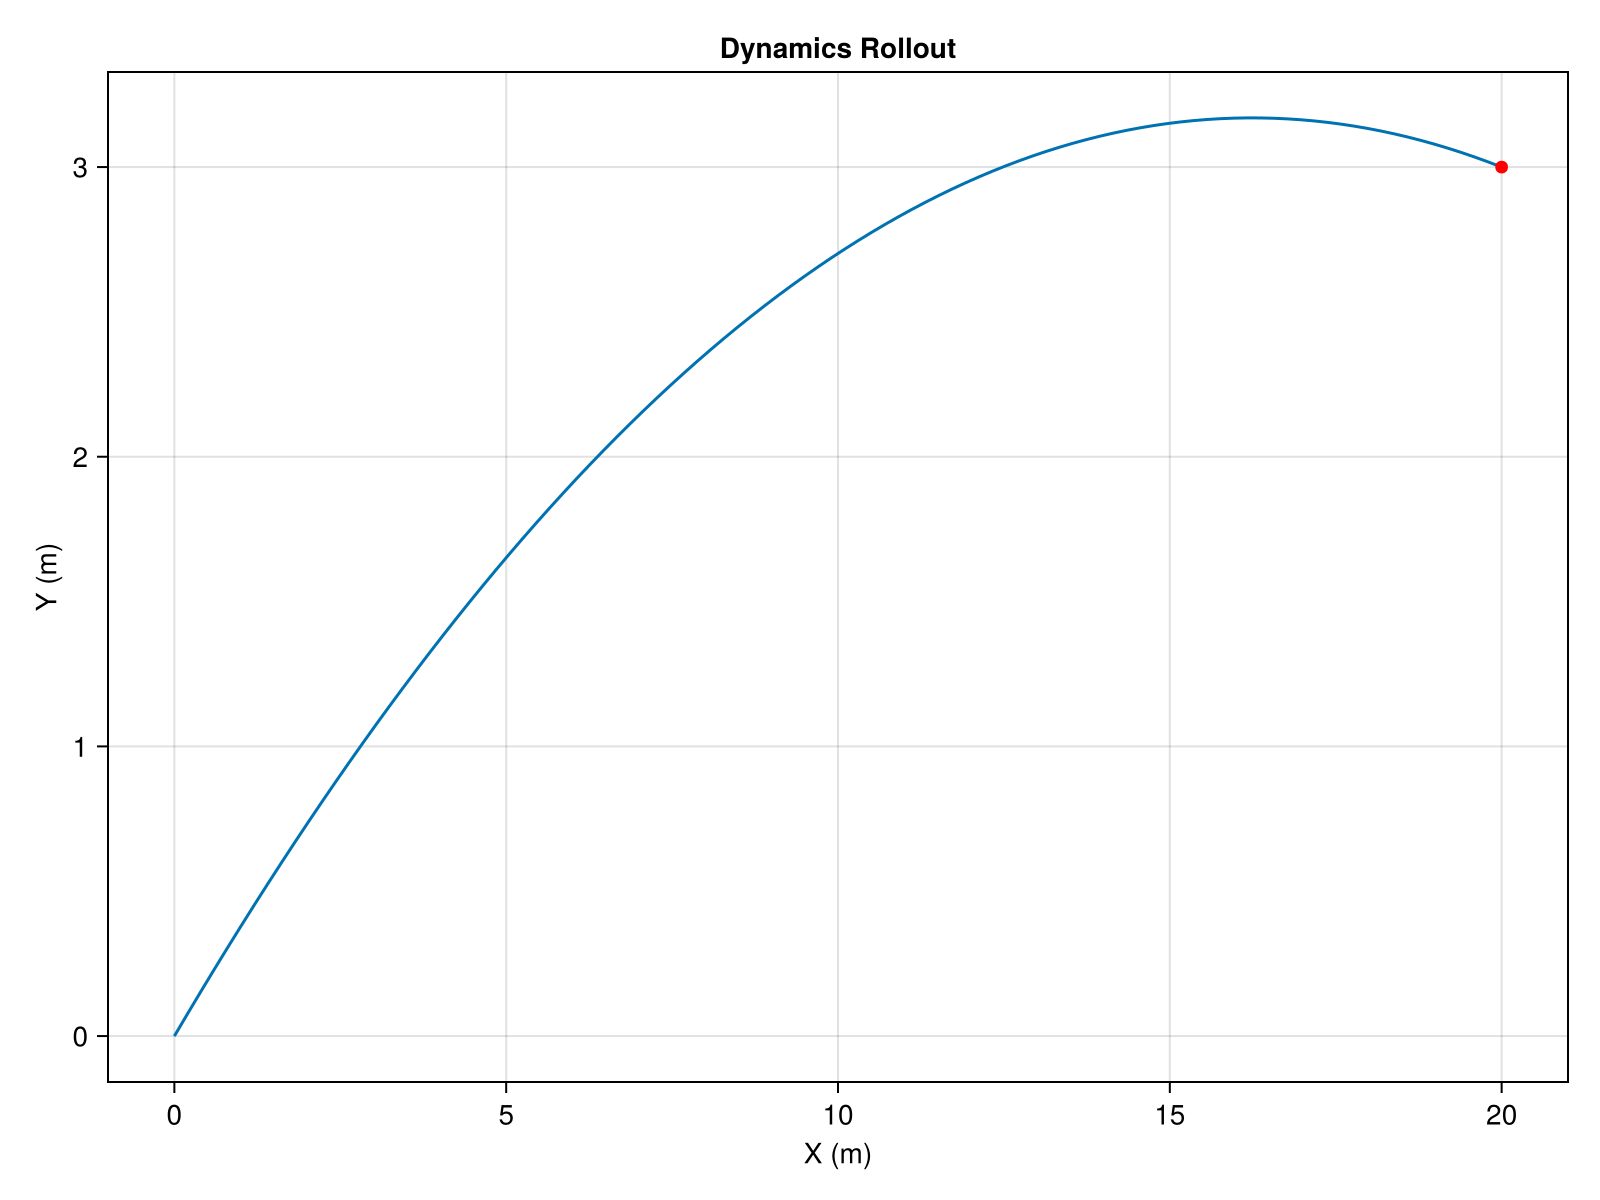

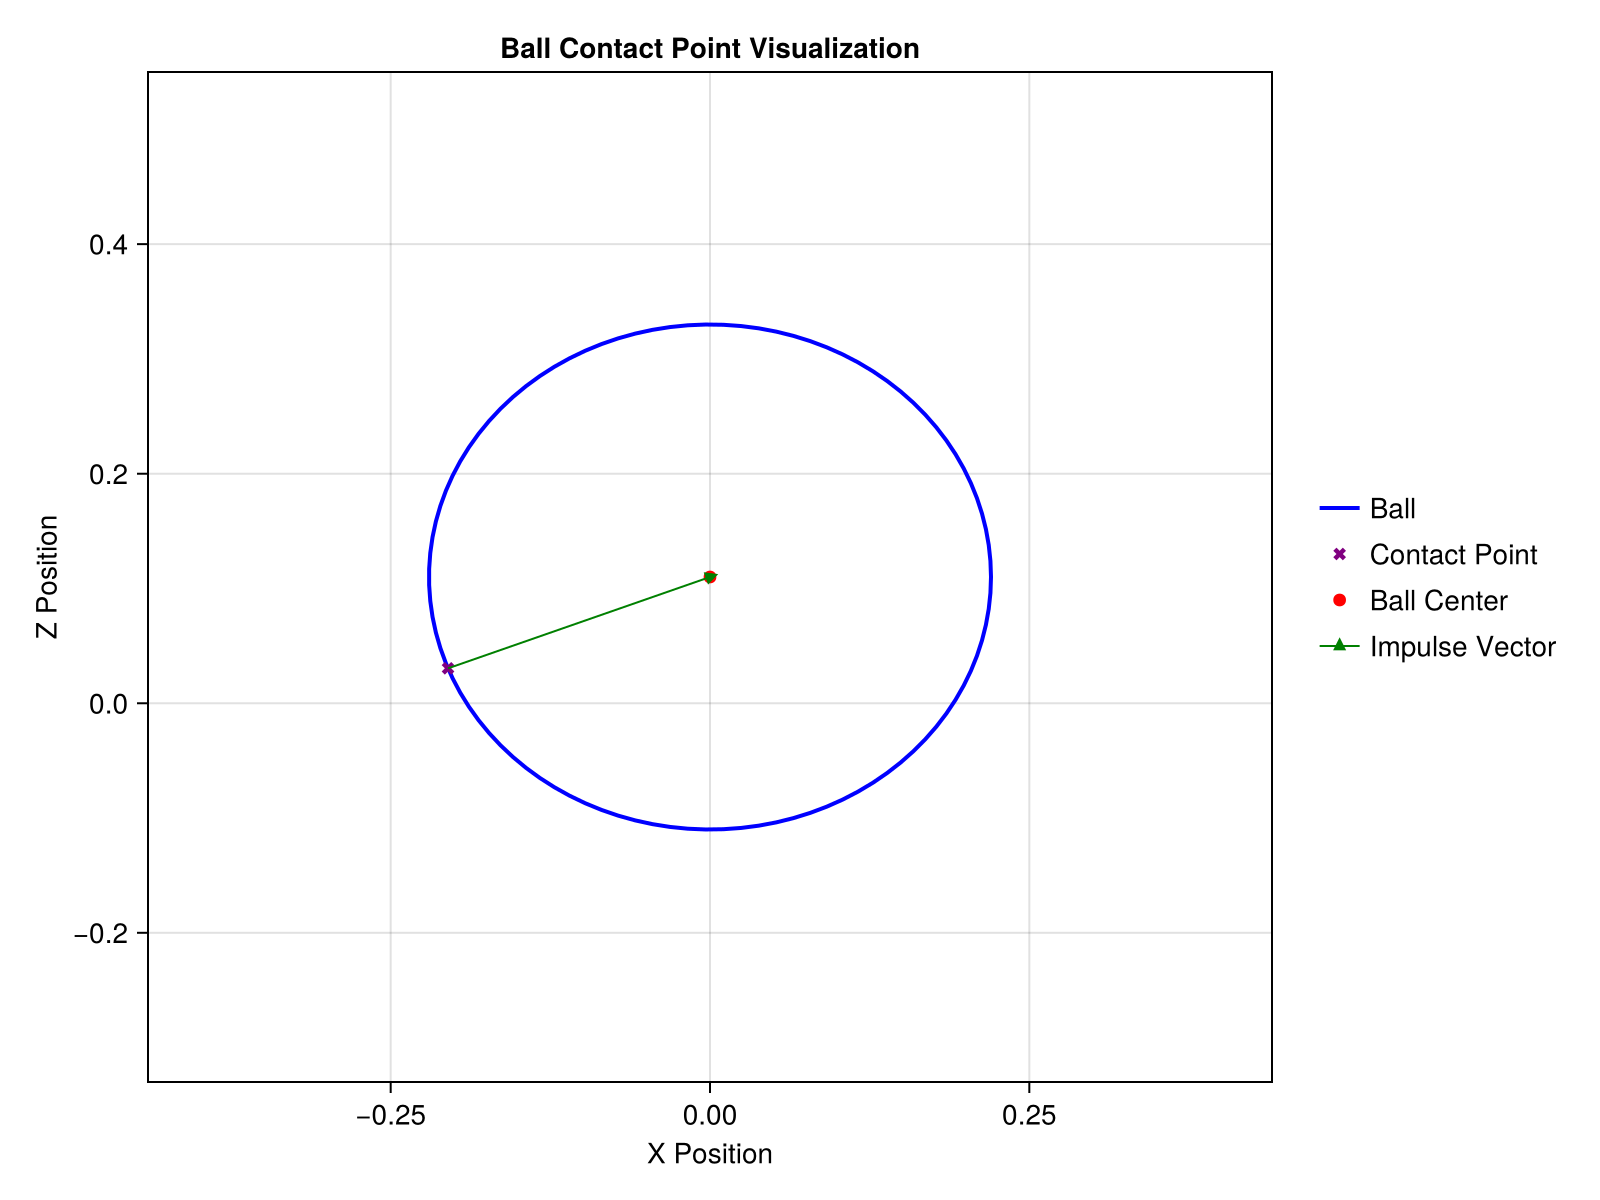

CairoMakie.Screen{IMAGE}


In [45]:
q_i = [0.0, 0.0] # Note, this is in the X-Z Plane only, y value will be assigned manually after the fact
q_des = [20.0, 3.0]
J = optimize_impulse(q_des, q_i) # Can also specify mass
dynamics_rollout(J, q_des, q_i)
p_c = get_contact_point(J) # Can also specify radius of ball
visualize_contact(J, p_c)

## Calculating Kick Trajectory

In [3]:
using Pkg

#Pkg.add("NamedTrajectories")
#Pkg.add("CairoMakie")
#Pkg.add("BenchmarkTools")
#Pkg.add(url="https://github.com/kevin-tracy/lazy_nlp_qd.jl.git")
#Pkg.add("ProgressMeter")
using NamedTrajectories
using CairoMakie
using BenchmarkTools
import ForwardDiff as FD
using LinearAlgebra
using Plots
using lazy_nlp_qd
#import MeshCat as mc
using StaticArrays
using ProgressMeter
include(joinpath(@__DIR__, "../src/utils/utils.jl"))
include(joinpath(@__DIR__, "../src/utils/nlp_utils.jl"))

constraint_violation (generic function with 1 method)

In [4]:
function hermite_simpson(params::NamedTuple, x1::Vector, x2::Vector, u)::Vector
    model = params.model
    dt = params.dt
    x1dot = dynamics(model, x1, u)
    x2dot = dynamics(model, x2, u)
    x_k12 = 1/2 * (x1 + x2) + dt/8 * (x1dot - x2dot)
    return x1 + dt/6 * (x1dot + 4 * dynamics(model, x_k12, u) + x2dot) - x2
end

hermite_simpson (generic function with 1 method)

In [47]:
# Define quadratic cost
function quadratic_cost(traj_indices::NamedTuple, k::Int64, Q::Matrix{Float64}, R::Matrix{Float64}, x_g, u_eq)
    xi, ui = traj_indices.x[k], traj_indices.u[k]
    # TODO: Tune this cost function
    cost_func(params::NamedTuple, z::Vector) = 0.5*((z[xi] - x_g)'*Q*(z[xi] - x_g) + (z[ui] - u_eq)'*R*(z[ui] - u_eq))
    function cost_grad!(params::NamedTuple, z::Vector{Float64}, grad::Vector{Float64})
        grad .+= ForwardDiff.gradient(z_ -> cost_func(params, z_), z)
    end
    return (cost_func=cost_func, cost_grad=cost_grad!)
end

# Dynamics Constraints
function dyn_constraint(traj_indices::NamedTuple, k::Int64)
    # Get indices for knot data in trajectory
    xi, ui, next_xi = traj_indices.x[k], traj_indices.u[k], traj_indices.x[k+1]

    residual(params::NamedTuple, z::Vector, con::AbstractVector) = con .= hermite_simpson(params, z[xi], z[next_xi], z[ui])
    
    function jacobian!(params::NamedTuple, z::Vector, conjac::AbstractMatrix)
        x_k, u_k, next_x_k = z[xi], z[ui], z[next_xi]
        conjac[:, xi] = FD.jacobian(x_ -> hermite_simpson(params, x_, next_x_k, u_k), x_k);
        conjac[:, ui] = FD.jacobian(u_ -> hermite_simpson(params, x_k, next_x_k, u_), u_k);
        conjac[:, next_xi] = FD.jacobian(x_ -> hermite_simpson(params, x_k, x_, u_k), next_x_k);
        return nothing
    end

    # Indication of which blocks are populated (i.e. sparsity structure) for constraint
    function sparsity!(conjac::AbstractMatrix)
        conjac[:, xi] .= 1;
        conjac[:, ui] .= 1;
        conjac[:, next_xi] .= 1;
        return nothing
    end
    bounds = (zeros(nx), zeros(nx))
    return (length=nx, residual=residual, jacobian=jacobian!, sparsity=sparsity!, bounds=bounds)
end

# State Intial Condition Constraint
function ic_constraint(traj_indices::NamedTuple, x_ic::Vector{Float64})
    x0 = traj_indices.x[1]
    residual(params::NamedTuple, z::Vector, con::AbstractVector) = con .= z[x0] - x_ic
    jacobian!(params::NamedTuple, z::Vector, conjac::AbstractMatrix) = conjac[:, x0] = I(length(x_ic))
    sparsity!(conjac::AbstractMatrix) = conjac[:, x0] .= 1
    bounds = (zeros(nx), zeros(nx))
    return (length=nx, residual=residual, jacobian=jacobian!, sparsity=sparsity!, bounds=bounds)
end

# State Goal Condition Constraint
function goal_constraint(traj_indices::NamedTuple, x_g::Vector{Float64}, N)
    x_N = traj_indices.x[N]
    residual(params::NamedTuple, z::Vector, con::AbstractVector) = con .= z[x_N] - x_g
    jacobian!(params::NamedTuple, z::Vector, conjac::AbstractMatrix) = conjac[:, x_N] = I(length(x_N))
    sparsity!(conjac::AbstractMatrix) = conjac[:, x_N] .= 1
    bounds = (zeros(nx), zeros(nx))
    return (length=nx, residual=residual, jacobian=jacobian!, sparsity=sparsity!, bounds=bounds)
end

# Set up new constraints in the same way as initial condition constraint 

goal_constraint (generic function with 1 method)

-----------------checking dimensions of everything-------------

-----------------checking primal bounds------------------------

-----------------IPOPT beginning solve-------------------------

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:    98624
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      930
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      930
                     variables with only upper bounds:        0
Total number of equality constraints.................:      704
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constrain

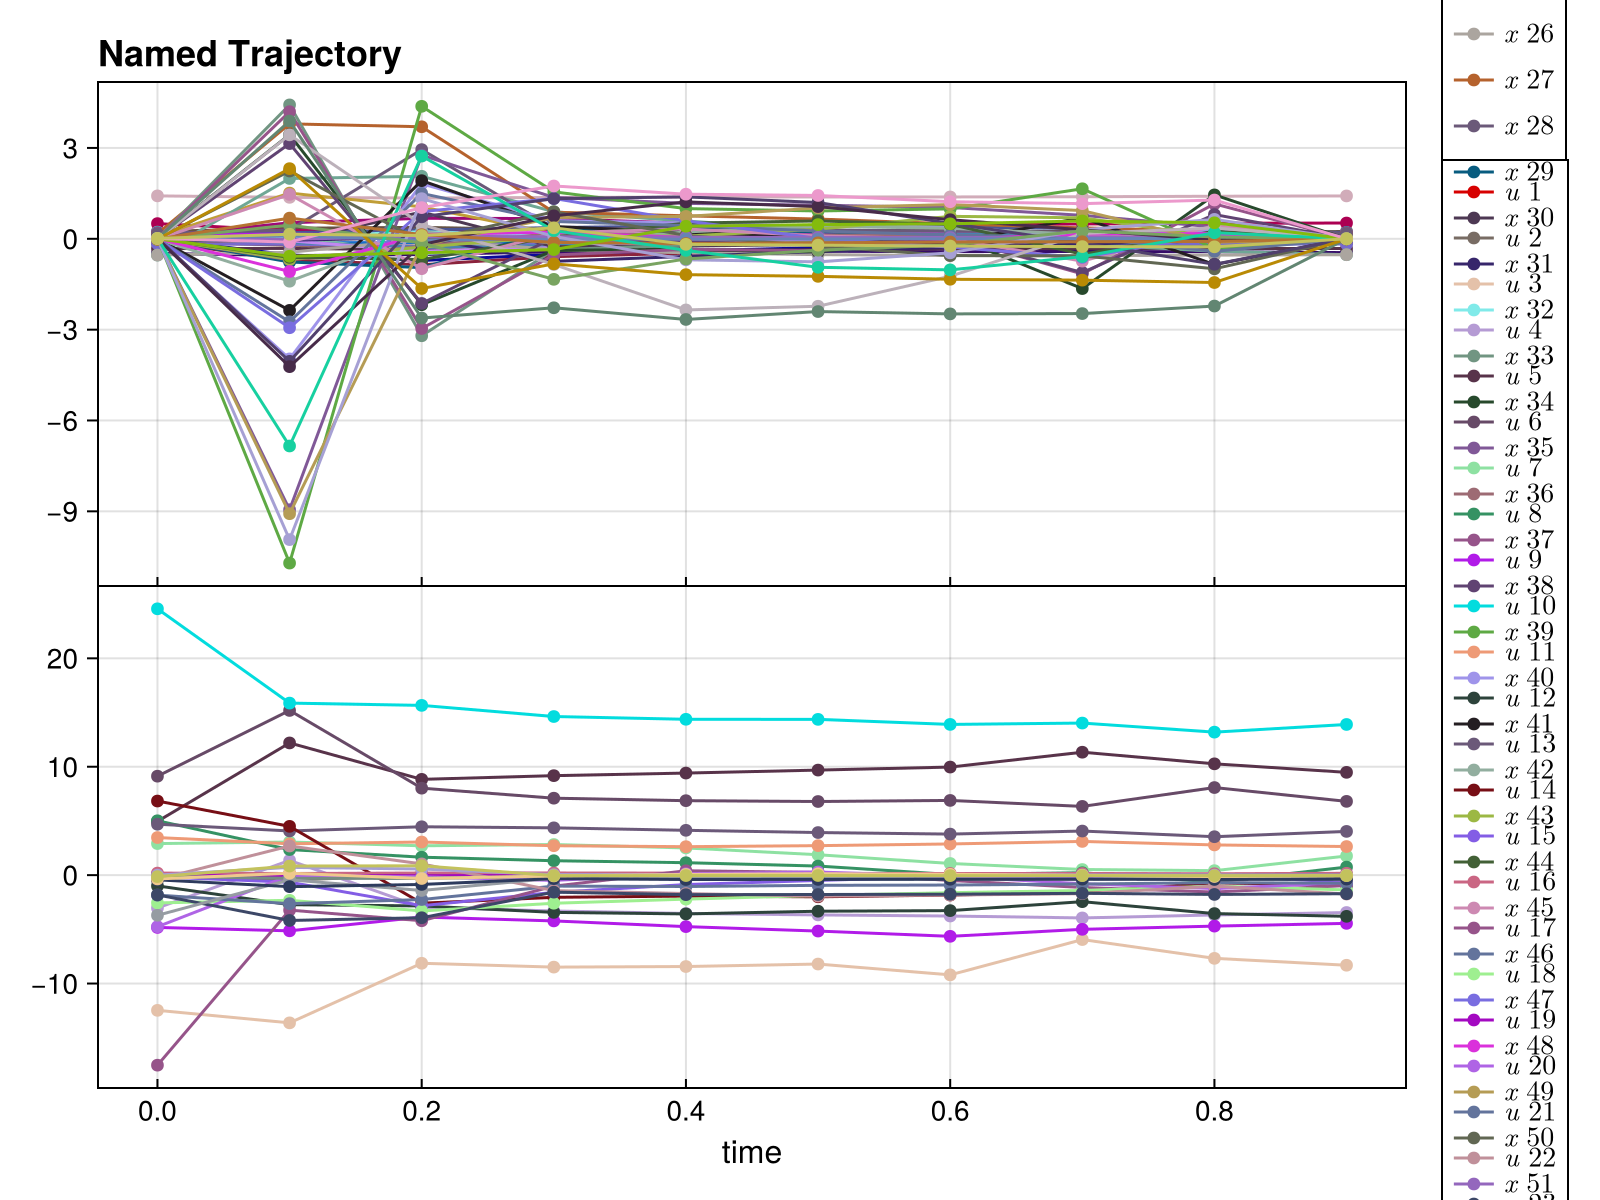

In [48]:
nx, nu, dt, N = size(x_eq, 1), size(u_eq, 1), 0.1, 10

Q = diagm(1e0 * ones(nx))
R = diagm(1e0*ones(nu))

x_ic = x_eq .+ 0.01 * randn(size(x_eq)) 
x_g = 1 * x_eq
components = (
    x = rand(nx, N),
    u = rand(nu, N),
)

traj = NamedTrajectory(components; timestep=dt, controls=:u)
traj_indices = NamedTuple{traj.names}([[(k - 1)*traj.dim .+ getproperty(traj.components, symbol) for k in 1:traj.T] for symbol in traj.names])
cost_objs = [quadratic_cost(traj_indices, k, Q, R, x_g, u_eq) for k = 1:N]
con_objs = Vector{NamedTuple}([ic_constraint(traj_indices, x_ic), goal_constraint(traj_indices, x_g, N), [dyn_constraint(traj_indices, k) for k = 1:N-1]...])
nc, conjac = setup_constraints(traj, con_objs)

param = (costs = cost_objs, constraints = con_objs, nconstraints=nc, nz=length(traj.datavec), model=model, dt=dt)

# Constrain bounds (equality and inequality)
c_l, c_u = constraint_bounds(param)

# Intial_guess
#z0 = randn(param.nz) * 0.01
z0 = vcat([[x_eq; u_eq] for _ in 1:N]...) 

# primal bounds
z_l, z_u = fill(-1000.0, param.nz), fill(1000.0, param.nz)

z = lazy_nlp_qd.sparse_fmincon(cost_func,
                            cost_gradient!,
                            constraint_residual!,
                            constraint_jacobian!,
                            conjac,
                            z_l,
                            z_u, 
                            c_l,
                            c_u,
                            z0,
                            param);

traj.datavec .= z
# Plot result
CairoMakie.plot(traj)